<a href="https://colab.research.google.com/github/alecbidaran/ML-for-remote-sensing-Homeworks/blob/main/NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import rasterio
from rasterio.plot import reshape_as_image
import rasterio.mask
from rasterio.features import rasterize
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from geopandas import GeoSeries
from shapely.geometry import Polygon
from rasterio.windows import Window
from rasterio.plot import reshape_as_image


%matplotlib inline

#### In this excersice, we compute NDVI of 200-300 fields.
#### In order to solve it, first, we compute NDVI from B4 and B8 file. 
#### In the next step, we extract field ids from 200 to 300. Then we crop ndvi rasters with mentioned field ids.

In [ ]:
PROJECT_DIR = 'data/'

RASTER_PATH = os.path.join(PROJECT_DIR, 'ndvi.tif')
TRAIN_POLYGONS_PATH = os.path.join(PROJECT_DIR, 'train-20220726T194123Z-001/train/train.shp')
TRAIN_POLYGONS_CONVERTED = os.path.join(PROJECT_DIR, 'train-20220726T194123Z-001/train/train.geojson')
RASTER_MASK_PATH = os.path.join(PROJECT_DIR, 'mask.jp2')
FRAGMENT_STORAGE = os.path.join(PROJECT_DIR, 'split')
CROPPED_IMAGES = os.path.join(PROJECT_DIR, 'ndvi')

In [ ]:
with rasterio.open(RASTER_PATH,'r') as src:
    raster=src.read()
    metadata=src.meta

In [ ]:
metadata

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32734),
 'transform': Affine(10.0, 0.0, 499980.0,
        0.0, -10.0, 6900040.0)}

In [ ]:
df=gpd.read_file(TRAIN_POLYGONS_CONVERTED)
df.crs={'init':'epsg:32734'}

/home/ali/.local/lib/python3.8/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/ali/.local/lib/python3.8/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out
/home/ali/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
selected=[]
for i in range(200,300):
    v=df[df["Field_Id"]==i]
    selected.append(v)
    

In [ ]:
selected_values=pd.concat(selected)
selected_values

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
139,200,0.519965,3,8,"POLYGON ((605651.448 6806128.924, 605616.184 6..."
2553,201,1.873660,3,None,"POLYGON ((605646.512 6805392.676, 605680.400 6..."
140,202,0.767730,3,5,"POLYGON ((605764.355 6805530.013, 605775.436 6..."
2554,203,1.402170,3,None,"POLYGON ((605767.943 6805653.324, 605769.676 6..."
2555,204,1.357730,1,None,"POLYGON ((605799.780 6805896.534, 605823.107 6..."
...,...,...,...,...,...
198,295,1.544030,3,4,"POLYGON ((609972.658 6800764.167, 610130.086 6..."
199,296,1.778420,3,8,"POLYGON ((610023.944 6800843.809, 610161.878 6..."
200,297,0.332092,3,8,"POLYGON ((609986.034 6800858.144, 610014.915 6..."
201,298,2.532020,3,7,"POLYGON ((610040.299 6800953.340, 610212.975 6..."


In [ ]:
# save converted dataframe
TRAIN_POLYGONS_CONVERTED = os.path.join(PROJECT_DIR, 'train-20220726T194123Z-001/train/pts200-300.geojson')
selected_values.to_file(TRAIN_POLYGONS_CONVERTED,driver="GeoJSON")

Extract feilds

In [ ]:
# create tiles of each field
failed=0
images=[]
src=rasterio.open(RASTER_PATH,'r')
for num,row in selected_values.iterrows():
    try: 
        cropped_img, cropped_transform=rasterio.mask.mask(src,[df['geometry'].iloc[num]],crop=True,nodata=0)
        cropped_img=reshape_as_image(cropped_img)
        #save_path=os.path.join(CROPPED_IMAGES,"{}.jpg".format(row['Field_Id']))
        #cv2.imwrite(save_path,cropped_img)
        images.append(cropped_img)
    except Exception as error: 
        failed+=1
        print(error)

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap 

#### Finally we add cropped ndvis. Then we compute each means of rasters and the overall mean.  The code below illustrates the overal mean and each means of rasters.

In [ ]:
sums=[]
for img in images:
    s=np.mean(img)
    sums.append(s)

In [ ]:
np.mean(sums)

0.2178294678530861

In [ ]:
sums

[0.17485405805725857,
 0.09962452450735403,
 0.4071569471939158,
 0.39070688274282056,
 0.37898608753080226,
 0.33171386780626005,
 0.055753878300695496,
 0.2879462015170159,
 0.30145272654225586,
 0.253594568237488,
 0.28995743602987983,
 0.16052895826127903,
 0.13314307035441425,
 0.1493373229811514,
 0.30686443324299323,
 0.322951092993311,
 0.139451765405289,
 0.17793315121909764,
 0.46863643985121206,
 0.36514621138416686,
 0.1996159183205966,
 0.16224994457264202,
 0.13240685221237639,
 0.3396737249200608,
 0.15368906554317563,
 0.3922244819843429,
 0.10448340684403798,
 0.055542826803765565,
 0.06976361788764325,
 0.06478759620982473,
 0.06790937586525547,
 0.05641202208107873,
 0.1938739817483815]

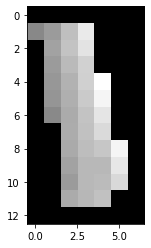

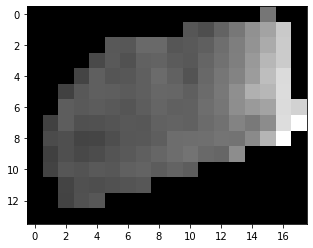

In [ ]:
plt.imshow(images[0],cmap="gray")
plt.figure()
plt.imshow(images[1],cmap="gray")
